# Optimize store data management with Python

 ...
 
 <br></br>

 
 My mission is to ...
 
 <br></br>
 
 
<u> Summary</u> :
 
 I. Explore and clean <a href="https://github.com/donia-nefiz/Optimize-store-data-management-with-Python.git" target="_blank">BottleNeck datas</a>
     <br>*1. [erp.csv](http://localhost:8888/edit/erp.csv) : exploration and data cleaning [(here)](#another_cell_a)*</br>
     <br>*2. [web.csv](http://localhost:8888/edit/web.csv) : exploration and data cleaning [(here)](#another_cell_b)*</br>
     <br>*3. [liaison.csv](http://localhost:8888/edit/liaison.csv) : exploration and data cleaning [(here)](#another_cell_c)*</br>
     <br>*4. New df (merge) and outliers management [(here)](#another_cell_d)*</br>
         <br>*-- a. First merge : df_liaison_web*
         <br>*-- b. Second merge : df_liaison_erp*
          <br>*-- b. Final merge : df_web_erp*


II. Calculation and univariate analysis
    <br>1. Sales revenue</br>
    <br>*-- a. Sales per products*
    <br>*-- b. Total sales*
    <br>1. Univariate analysis</br>
    <br>*-- a. Graphical representation of prices*
    <br>*-- b. Z-score calculation to manage outliers*
    
<br></br>   


*NB : this notebook is in english but all data are in french.*

## I. BottleNeck data, files exploration and data cleaning

In [1]:
import pandas as pd

In [2]:
import numpy as np

  <a id='another_cell_a'></a>

### 1. [erp.csv](http://localhost:8888/edit/erp.csv) : exploration and data cleaning

- Loading file:

In [3]:
erp = pd.read_csv('erp.csv', sep=';')

- First 5 rows display :

In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


- Number of rows and columns :

In [5]:
erp.shape

(825, 5)

- .dtypes display :

In [6]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

- "Valeur" columns .unique values display :

In [7]:
erp["product_id"].unique()

array([3847, 3849, 3850, 4032, 4039, 4040, 4041, 4042, 4043, 4045, 4046,
       4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057,
       4058, 4059, 4060, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069,
       4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4081,
       4083, 4084, 4085, 4086, 4087, 4090, 4092, 4094, 4095, 4096, 4097,
       4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108,
       4115, 4130, 4132, 4137, 4138, 4139, 4141, 4142, 4144, 4146, 4147,
       4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158,
       4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4170,
       4171, 4172, 4173, 4174, 4176, 4177, 4178, 4179, 4180, 4181, 4182,
       4183, 4186, 4187, 4188, 4190, 4191, 4192, 4193, 4194, 4195, 4196,
       4197, 4198, 4200, 4201, 4202, 4203, 4204, 4205, 4207, 4208, 4209,
       4210, 4211, 4212, 4213, 4215, 4216, 4217, 4219, 4220, 4221, 4222,
       4223, 4224, 4225, 4227, 4228, 4229, 4231, 42

In [8]:
erp["stock_status"].unique()

array(['outofstock', 'instock'], dtype=object)

In [9]:
erp["price"].unique()

array([ 24.2 ,  34.3 ,  20.8 ,  14.1 ,  46.  ,  32.7 ,  31.2 ,  60.  ,
        42.6 ,  80.  ,  18.3 ,  22.8 ,  19.3 ,  21.8 ,   7.7 ,  33.7 ,
        44.3 ,  71.6 ,  86.1 ,  12.7 ,   8.7 ,  11.9 ,  14.5 ,  14.4 ,
        19.5 ,  22.  ,  16.6 ,  23.4 ,  33.2 ,  32.  ,  77.8 ,  14.7 ,
        14.05,  22.9 ,  44.  ,  37.  ,  39.  ,  17.  ,  23.2 ,  19.  ,
        16.4 ,  73.  ,  47.  ,  13.7 ,  12.6 ,  12.8 ,  22.1 ,  15.8 ,
        16.3 ,   9.7 ,   6.8 ,  35.  ,  31.7 , 100.  ,  23.  ,  88.4 ,
        29.8 ,  25.7 ,  77.4 ,  53.  ,  49.  ,  29.5 ,  33.  ,  37.5 ,
        69.  ,  59.  ,  19.2 ,  29.  ,   9.8 ,  20.35,  12.  ,  18.5 ,
         9.3 ,  11.6 ,  14.3 ,  10.8 ,   7.6 ,  20.5 ,  18.2 ,   9.  ,
         7.8 ,   5.7 ,  13.5 ,  11.5 ,  24.  ,  16.7 ,  21.4 ,  13.3 ,
         9.5 ,  12.1 ,  17.8 ,  27.2 ,   9.4 ,   5.8 ,  38.  ,   9.9 ,
        11.3 ,   6.7 ,  73.5 ,  79.8 ,  48.5 ,  39.8 ,  58.8 ,  26.5 ,
        13.4 ,  17.1 ,   8.9 ,  17.2 ,  16.9 ,  29.9 ,   9.6 ,  11.1 ,
      

- Outlier management :

In [10]:
erp_error = erp.loc[erp["stock_status"].isin(["instock"])].copy()

In [11]:
erp_error["stock_quantity"].unique()

array([ 15,  34,  12,  66,  36,  22,  46,  41,  35,  16, 112, 267,  73,
        60,  10,  27,  65,  31, 157,  98,  28,  11,  50,  54,  53,  48,
        14,  37,  45,  24,  19,  26,  43,   7,   6,  42,   5,   1,   8,
        33,  18,  17,  57, 128,  70,  58, 167, 100,  94, 276, 109,  47,
       137,  90,  99, 209,  55,  13, 105, 190,  69,  89, 195, 578,   2,
        83, 180,  20,  49,  85, 141,  25,  64, 102,  21,  56,   4, 133,
         3,  96,   9,  61,  39, 237, 114, 106,  23,  32,  93, 161,  30,
       178,  29, 151, 140,  76,  97, 163,  62, 257, 284, 168, 143,  92,
        88,  44,   0,  95, 289,  72, 203, 129,  38,  63, 130,  51, 123,
       118, 101,  84, 132, 211, 124, 120, 363, 192,  40,  91], dtype=int64)

In [12]:
erp_error1 = erp_error.loc[erp_error["stock_quantity"].isin([0])].copy()

In [13]:
erp_error1

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [14]:
erp_error1.replace("instock","outofstock")

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,outofstock


 <a id='another_cell_b'></a>


### 2. [web.csv](http://localhost:8888/edit/web.csv) : exploration and data cleaning*

- Loading file:

In [15]:
web = pd.read_csv('web.csv', sep=';')

- First 5 rows display :

In [16]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


- Number of rows and columns :

In [17]:
web.shape

(1513, 28)

- .dtypes display :

In [18]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

- new web df :

In [19]:
web["virtual"].unique()

array([0], dtype=int64)

In [20]:
web["downloadable"].unique()

array([0], dtype=int64)

In [21]:
web["rating_count"].unique()

array([0], dtype=int64)

In [22]:
web["average_rating"].unique()

array([ 0., nan])

In [23]:
web["tax_class"].unique()

array([nan])

In [24]:
web["post_content"].unique()

array([nan])

In [25]:
web["post_content_filtered"].unique()

array([nan])

In [26]:
web["post_parent"].unique()

array([ 0., nan])

In [27]:
web["menu_order"].unique()

array([ 0., nan])

In [28]:
web["comment_count"].unique()

array([ 0., nan])

In [29]:
web_new = web[{'sku','total_sales','tax_status','post_author','post_date','post_date_gmt','post_title','post_excerpt','post_status','comment_status','ping_status','post_password','post_name','post_modified','post_modified_gmt','guid','post_type','post_mime_type'}]

In [30]:
web_new.head()

,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,post_title,post_excerpt,comment_status,post_password,post_date_gmt,guid,post_mime_type,tax_status,post_author
0,bon-cadeau-25-euros,bon-cadeau-de-25-euros,product,10.0,2018-06-01 12:13:57,closed,2018-06-01 14:13:57,publish,2018-06-01 13:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",closed,NaN,2018-06-01 11:53:46,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,1.0
1,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",closed,NaN,2018-02-08 11:58:52,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
2,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,closed,NaN,2018-02-08 12:49:41,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
3,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",closed,NaN,2018-02-08 13:08:36,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
4,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,closed,NaN,2018-02-09 13:01:05,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0


In [31]:
web_new.shape

(1513, 18)

- New df "product" :

In [32]:
web_new_product = web_new.loc[web_new["post_type"].isin(["product"])].copy()

In [33]:
web_new_product

,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,post_title,post_excerpt,comment_status,post_password,post_date_gmt,guid,post_mime_type,tax_status,post_author
0,bon-cadeau-25-euros,bon-cadeau-de-25-euros,product,10.0,2018-06-01 12:13:57,closed,2018-06-01 14:13:57,publish,2018-06-01 13:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",closed,NaN,2018-06-01 11:53:46,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,1.0
1,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",closed,NaN,2018-02-08 11:58:52,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
2,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,closed,NaN,2018-02-08 12:49:41,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
3,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",closed,NaN,2018-02-08 13:08:36,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
4,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,closed,NaN,2018-02-09 13:01:05,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,mouthes-le-bihan-aime-chai-2015,product,5.0,2020-08-26 15:35:03,closed,2020-08-26 17:35:03,publish,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,closed,NaN,2020-04-25 11:22:38,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
767,15891,camin-larredya-jurancon-sec-la-virada-2018,product,0.0,2020-08-26 15:35:02,closed,2020-08-26 17:35:02,publish,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,closed,NaN,2020-05-02 12:53:40,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
768,15887,jamet-cote-rotie-fructus-voluptas-2018,product,0.0,2020-08-14 16:15:03,closed,2020-08-14 18:15:03,publish,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",closed,NaN,2020-05-02 13:00:54,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
797,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0,2020-07-20 15:09:06,closed,2020-07-20 17:09:06,publish,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",closed,NaN,2020-06-09 13:42:04,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0


- Check and delete NaN values on "sku" column :

In [34]:
web_new_product.shape

(716, 18)

In [35]:
web_new_product['sku'].isnull().sum()

2

In [36]:
empty_sku = web_new_product.loc[web_new_product["sku"].isnull()].copy()

In [37]:
empty_sku

,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,post_title,post_excerpt,comment_status,post_password,post_date_gmt,guid,post_mime_type,tax_status,post_author
470,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,product,0.0,2019-11-02 12:24:15,closed,2019-11-02 13:24:15,publish,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",closed,NaN,2018-07-31 10:07:23,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0
471,NaN,pierre-jean-villa-condrieu-suspendu-2018,product,0.0,2019-11-02 12:24:01,closed,2019-11-02 13:24:01,publish,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",closed,NaN,2018-08-08 09:23:43,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0


In [38]:
web_new_product.dropna(subset=['sku'], inplace=True)

In [39]:
web_new_product.shape

(714, 18)

  <a id='another_cell_c'></a>

### 3. [liaison.csv](http://localhost:8888/edit/liaison.csv) : exploration and data cleaning


- Loading file:

In [40]:
liaison = pd.read_csv('liaison.csv', sep=';')

- First 5 rows display :

In [41]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


- Number of rows and columns :

In [42]:
liaison.shape

(825, 2)

- .dtypes display :

In [43]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [44]:
liaison.rename(columns = {"id_web": "sku"}, inplace=True)

In [45]:
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


 <a id='another_cell_d'></a>

### 4. New df (merge) and outliers management

#### a. First merge : df_liaison_web

In [46]:
df_liaison_web = liaison.merge(web_new_product, on="sku", how="outer", indicator=True)

In [47]:
df_liaison_web

,product_id,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,post_title,post_excerpt,comment_status,post_password,post_date_gmt,guid,post_mime_type,tax_status,post_author,_merge
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",closed,NaN,2018-02-08 11:58:52,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,closed,NaN,2018-02-08 12:49:41,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",closed,NaN,2018-02-08 13:08:36,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
3,4032,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,closed,NaN,2018-02-09 13:01:05,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0,2020-01-04 15:36:10,closed,2020-01-04 16:36:10,publish,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,closed,NaN,2018-02-12 08:04:37,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,product,0.0,2020-08-26 15:35:02,closed,2020-08-26 17:35:02,publish,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,closed,NaN,2020-05-02 12:53:40,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
821,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,product,0.0,2020-08-14 16:15:03,closed,2020-08-14 18:15:03,publish,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",closed,NaN,2020-05-02 13:00:54,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
822,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0,2020-07-20 15:09:06,closed,2020-07-20 17:09:06,publish,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",closed,NaN,2020-06-09 13:42:04,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
823,7329,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [48]:
left_only_1 = df_liaison_web.loc[df_liaison_web["_merge"].isin(["left_only"])].copy()

In [49]:
left_only_1.shape

(111, 20)

In [50]:
print(left_only_1.isnull().sum())

product_id             0
sku                   91
post_name            111
post_type            111
total_sales          111
post_modified_gmt    111
ping_status          111
post_modified        111
post_status          111
post_date            111
post_title           111
post_excerpt         111
comment_status       111
post_password        111
post_date_gmt        111
guid                 111
post_mime_type       111
tax_status           111
post_author          111
_merge                 0
dtype: int64


In [51]:
df_liaison_web.dropna(subset=['sku'], inplace=True)

In [52]:
df_liaison_web

,product_id,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,post_title,post_excerpt,comment_status,post_password,post_date_gmt,guid,post_mime_type,tax_status,post_author,_merge
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",closed,NaN,2018-02-08 11:58:52,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,closed,NaN,2018-02-08 12:49:41,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",closed,NaN,2018-02-08 13:08:36,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
3,4032,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,closed,NaN,2018-02-09 13:01:05,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0,2020-01-04 15:36:10,closed,2020-01-04 16:36:10,publish,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,closed,NaN,2018-02-12 08:04:37,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,product,0.0,2020-08-26 15:35:02,closed,2020-08-26 17:35:02,publish,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,closed,NaN,2020-05-02 12:53:40,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
821,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,product,0.0,2020-08-14 16:15:03,closed,2020-08-14 18:15:03,publish,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",closed,NaN,2020-05-02 13:00:54,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
822,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0,2020-07-20 15:09:06,closed,2020-07-20 17:09:06,publish,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",closed,NaN,2020-06-09 13:42:04,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both
823,7329,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [53]:
print(df_liaison_web.isnull().sum())

product_id             0
sku                    0
post_name             20
post_type             20
total_sales           20
post_modified_gmt     20
ping_status           20
post_modified         20
post_status           20
post_date             20
post_title            20
post_excerpt          20
comment_status        20
post_password        734
post_date_gmt         20
guid                  20
post_mime_type       734
tax_status            20
post_author           20
_merge                 0
dtype: int64


#### b. Second merge : df_liaison_erp

In [54]:
df_liaison_erp = liaison.merge(erp, on="product_id", how="outer", indicator=True)

In [55]:
df_liaison_erp

,product_id,sku,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both
...,...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock,both
821,7204,NaN,0,45.0,9,instock,both
822,7247,13127-1,1,54.8,23,instock,both
823,7329,14680-1,0,26.5,14,instock,both


In [56]:
left_only_2 = df_liaison_erp.loc[df_liaison_erp["_merge"].isin(["left_only"])].copy()

In [57]:
left_only_2.shape

(0, 7)

In [58]:
df_liaison_erp.dropna(subset=['sku'], inplace=True)

In [59]:
df_liaison_erp.shape

(734, 7)

In [60]:
df_liaison_erp.drop('_merge',1,inplace=True)

In [61]:
df_liaison_erp.shape

(734, 6)

#### c. Final merge : df_web_erp

In [62]:
df_web_erp = df_liaison_web.merge(df_liaison_erp, on="product_id", how="inner")

In [63]:
df_web_erp

,product_id,sku_x,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,...,guid,post_mime_type,tax_status,post_author,_merge,sku_y,onsale_web,price,stock_quantity,stock_status
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,15298,1,24.2,0,outofstock
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,15296,1,34.3,0,outofstock
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,15300,1,20.8,0,outofstock
3,4032,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,19814,1,14.1,0,outofstock
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0,2020-01-04 15:36:10,closed,2020-01-04 16:36:10,publish,2018-02-12 09:04:37,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,product,0.0,2020-08-26 15:35:02,closed,2020-08-26 17:35:02,publish,2020-05-02 14:53:40,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,15891,1,27.5,15,instock
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,product,0.0,2020-08-14 16:15:03,closed,2020-08-14 18:15:03,publish,2020-05-02 15:00:54,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,15887,1,69.0,2,instock
731,7247,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,0.0,2020-07-20 15:09:06,closed,2020-07-20 17:09:06,publish,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/?post_type=product&...,NaN,taxable,2.0,both,13127-1,1,54.8,23,instock
732,7329,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,left_only,14680-1,0,26.5,14,instock


In [64]:
df_web_erp.drop('sku_y',1,inplace=True)

In [65]:
df_web_erp.rename(columns = {"sku_x" : "sku"}, inplace=True)

In [66]:
df_web_erp.shape

(734, 24)

In [67]:
df_web_erp.dropna(subset=['post_title'], inplace=True)

In [68]:
df_web_erp.shape

(714, 24)

- Drop duplicates on "post_title" and "price" columns :

In [69]:
df_web_erp.drop_duplicates({'post_title','price'}, inplace=True)

In [70]:
df_web_erp.shape

(712, 24)

- Check null values and drop empty and useless columns :

In [71]:
print(df_web_erp.isnull().sum())

product_id             0
sku                    0
post_name              0
post_type              0
total_sales            0
post_modified_gmt      0
ping_status            0
post_modified          0
post_status            0
post_date              0
post_title             0
post_excerpt           0
comment_status         0
post_password        712
post_date_gmt          0
guid                   0
post_mime_type       712
tax_status             0
post_author            0
_merge                 0
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
dtype: int64


In [72]:
df_web_erp.drop(columns={'post_mime_type','post_password'}, inplace=True)

In [73]:
print(df_web_erp.isnull().sum())

product_id           0
sku                  0
post_name            0
post_type            0
total_sales          0
post_modified_gmt    0
ping_status          0
post_modified        0
post_status          0
post_date            0
post_title           0
post_excerpt         0
comment_status       0
post_date_gmt        0
guid                 0
tax_status           0
post_author          0
_merge               0
onsale_web           0
price                0
stock_quantity       0
stock_status         0
dtype: int64


In [74]:
df_web_erp.drop(columns={'_merge'}, inplace=True)

## 2. BottleNeck data, sales and univariate analysis

### A. Sales revenue

#### a. Sales per product

In [75]:
df_web_erp.head()

,product_id,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,...,post_excerpt,comment_status,post_date_gmt,guid,tax_status,post_author,onsale_web,price,stock_quantity,stock_status
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,...,"Il exhale un nez subtil, racé avec du poivre f...",closed,2018-02-08 11:58:52,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,24.2,0,outofstock
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,...,Les vieilles vignes lui apportent une rare pro...,closed,2018-02-08 12:49:41,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,34.3,0,outofstock
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,...,"Dentelle de fruit de jeunes syrah, aux tanins ...",closed,2018-02-08 13:08:36,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,20.8,0,outofstock
3,4032,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,...,Gamine représente tout le fruité et la gourman...,closed,2018-02-09 13:01:05,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,14.1,0,outofstock
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0,2020-01-04 15:36:10,closed,2020-01-04 16:36:10,publish,2018-02-12 09:04:37,...,Le côte rôtie Carmina monte en puissance mais ...,closed,2018-02-12 08:04:37,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,46.0,0,outofstock


In [76]:
df_web_erp['sales_per_products'] = df_web_erp['total_sales'] * df_web_erp['price']

In [77]:
df_web_erp

,product_id,sku,post_name,post_type,total_sales,post_modified_gmt,ping_status,post_modified,post_status,post_date,...,comment_status,post_date_gmt,guid,tax_status,post_author,onsale_web,price,stock_quantity,stock_status,sales_per_products
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,product,6.0,2019-12-30 08:30:29,closed,2019-12-30 09:30:29,publish,2018-02-08 12:58:52,...,closed,2018-02-08 11:58:52,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,24.2,0,outofstock,145.2
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0,2019-12-21 08:00:17,closed,2019-12-21 09:00:17,publish,2018-02-08 13:49:41,...,closed,2018-02-08 12:49:41,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,34.3,0,outofstock,0.0
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0,2020-06-26 16:15:03,closed,2020-06-26 18:15:03,publish,2018-02-08 14:08:36,...,closed,2018-02-08 13:08:36,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,20.8,0,outofstock,0.0
3,4032,19814,pierre-jean-villa-igp-gamine-2018,product,3.0,2020-01-04 15:36:01,closed,2020-01-04 16:36:01,publish,2018-02-09 14:01:05,...,closed,2018-02-09 13:01:05,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,14.1,0,outofstock,42.3
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0,2020-01-04 15:36:10,closed,2020-01-04 16:36:10,publish,2018-02-12 09:04:37,...,closed,2018-02-12 08:04:37,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,46.0,0,outofstock,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,6928,15741,cedre-de-jean-faure-saint-emilion-2016,product,2.0,2020-08-27 13:15:02,closed,2020-08-27 15:15:02,publish,2020-04-25 12:49:49,...,closed,2020-04-25 10:49:49,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,19.0,20,instock,38.0
728,6930,16135,mouthes-le-bihan-aime-chai-2015,product,5.0,2020-08-26 15:35:03,closed,2020-08-26 17:35:03,publish,2020-04-25 13:22:38,...,closed,2020-04-25 11:22:38,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,8.4,83,instock,42.0
729,7023,15891,camin-larredya-jurancon-sec-la-virada-2018,product,0.0,2020-08-26 15:35:02,closed,2020-08-26 17:35:02,publish,2020-05-02 14:53:40,...,closed,2020-05-02 12:53:40,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,27.5,15,instock,0.0
730,7025,15887,jamet-cote-rotie-fructus-voluptas-2018,product,0.0,2020-08-14 16:15:03,closed,2020-08-14 18:15:03,publish,2020-05-02 15:00:54,...,closed,2020-05-02 13:00:54,https://www.bottle-neck.fr/?post_type=product&...,taxable,2.0,1,69.0,2,instock,0.0


#### b. Total sales

In [78]:
Total_sales = df_web_erp['sales_per_products'].sum()

In [79]:
print("The total sales made online is about", round(Total_sales),"€.")

The total sales made online is about 70569 €.


### B. Univariate analysis

#### a. Graphical representation of prices

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns 

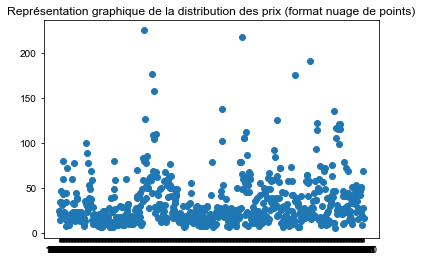

In [81]:
plt.scatter(df_web_erp["sku"], df_web_erp["price"]) 
plt.title("Représentation graphique de la distribution des prix (format nuage de points)")
plt.style.use('seaborn')
plt.show()

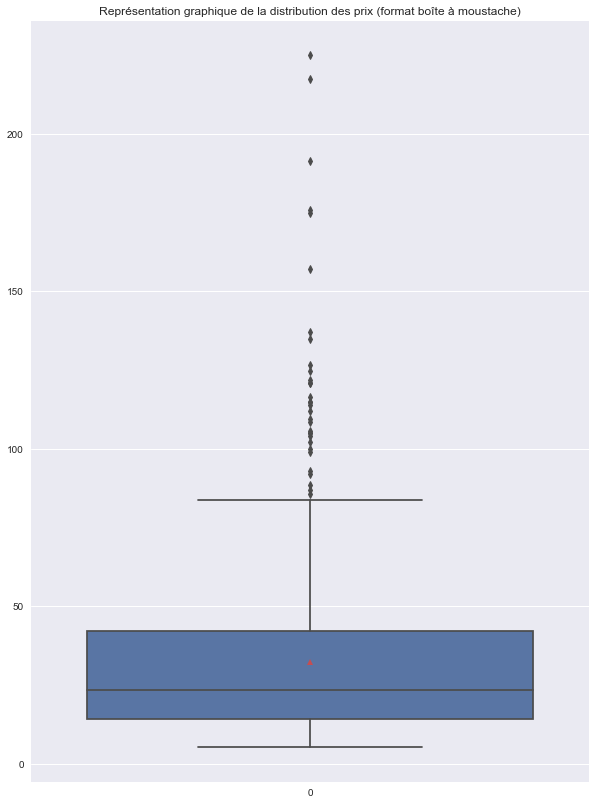

In [82]:
np.random.seed(10) 
fig = plt.figure(figsize =(10, 14)) 
plt.boxplot(df_web_erp["price"])
sns.boxplot(data=df_web_erp["price"], 
            showmeans=True) 
plt.title("Représentation graphique de la distribution des prix (format boîte à moustache)") 
plt.show() 

In [83]:
df_web_erp['price'].describe()


count    712.000000
mean      32.420927
std       27.815540
min        5.200000
25%       14.087500
50%       23.450000
75%       42.025000
max      225.000000
Name: price, dtype: float64

#### b. Z-score calculation to manage outliers

In [84]:
threshold = 2

In [85]:
mean_price = df_web_erp['price'].mean()
print(mean_price)

32.42092696629214


In [86]:
std_price = df_web_erp['price'].std()
print(std_price)

27.815539631480068


In [87]:
z_score_outlier = [i for i in df_web_erp['price']
                   if (i - mean_price) / std_price > threshold]

In [88]:
z_score_outlier

[100.0,
 88.4,
 225.0,
 126.5,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]

In [89]:
print("La colonne 'price' du dataframe 'df_web_erp' contient", len(z_score_outlier), "valeurs aberrantes qui sont les suivantes :", z_score_outlier)

La colonne 'price' du dataframe 'df_web_erp' contient 30 valeurs aberrantes qui sont les suivantes : [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
